In [27]:
import os
import pandas as pd
import numpy as np
import re

In [28]:
synthetic_results_dir = "C:\\Users\\matte\\Desktop\\results\\synthetic\\"

classic_miners_dir = os.path.join(synthetic_results_dir, "classic_miners")

sommers_dir = os.path.join(synthetic_results_dir, "sommers")

my_miner_dir = os.path.join(synthetic_results_dir, "mine")
mine_wo_silent = os.path.join(my_miner_dir, "inference")
mine_w_silent = os.path.join(my_miner_dir, "inference_silent")


# Classic Miners

In [29]:
cm_folders = os.listdir(classic_miners_dir)

alpha = {"fitness":[],"precision":[],"generalization":[],"simplicity":[]}
alpha_plus = {"fitness":[],"precision":[],"generalization":[],"simplicity":[]}
heuristics = {"fitness":[],"precision":[],"generalization":[],"simplicity":[]}
inductive = {"fitness":[],"precision":[],"generalization":[],"simplicity":[]}

for folder in cm_folders:
    alpha_result_file = os.path.join(classic_miners_dir, folder, "alpha", folder+"res.txt")
    with open(alpha_result_file, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "fitness" in line:
                result = re.findall(r"'log_fitness': \d\.\d+", line)
                alpha["fitness"].append(float(result[0].split(':')[-1].replace(' ','')))
            elif "precision" in line:
                result = re.findall(r"\d\.\d+", line)
                alpha["precision"].append(float(result[0]))
            elif "generalization" in line:
                result = re.findall(r"\d\.\d+", line)
                alpha["generalization"].append(float(result[0]))
            elif "simplicity" in line:
                result = re.findall(r"\d\.\d+", line)
                alpha["simplicity"].append(float(result[0]))
    
    alpha_plus_result_file = os.path.join(classic_miners_dir, folder, "alpha_plus", folder+"res.txt")
    with open(alpha_plus_result_file, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "fitness" in line:
                result = re.findall(r"'log_fitness': \d\.\d+", line)
                alpha_plus["fitness"].append(float(result[0].split(':')[-1].replace(' ','')))
            elif "precision" in line:
                result = re.findall(r"\d\.\d+", line)
                alpha_plus["precision"].append(float(result[0]))
            elif "generalization" in line:
                result = re.findall(r"\d\.\d+", line)
                alpha_plus["generalization"].append(float(result[0]))
            elif "simplicity" in line:
                result = re.findall(r"\d\.\d+", line)
                alpha_plus["simplicity"].append(float(result[0]))
    
    heuristics_result_file = os.path.join(classic_miners_dir, folder, "heuristics", folder+"res.txt")
    with open(heuristics_result_file, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "fitness" in line:
                result = re.findall(r"'log_fitness': \d\.\d+", line)
                heuristics["fitness"].append(float(result[0].split(':')[-1].replace(' ','')))
            elif "precision" in line:
                result = re.findall(r"\d\.\d+", line)
                heuristics["precision"].append(float(result[0]))
            elif "generalization" in line:
                result = re.findall(r"\d\.\d+", line)
                heuristics["generalization"].append(float(result[0]))
            elif "simplicity" in line:
                result = re.findall(r"\d\.\d+", line)
                heuristics["simplicity"].append(float(result[0]))
    
    inductive_result_file = os.path.join(classic_miners_dir, folder, "inductive", folder+"res.txt")
    with open(inductive_result_file, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "fitness" in line:
                result = re.findall(r"'log_fitness': \d\.\d+", line)
                inductive["fitness"].append(float(result[0].split(':')[-1].replace(' ','')))
            elif "precision" in line:
                result = re.findall(r"\d\.\d+", line)
                inductive["precision"].append(float(result[0]))
            elif "generalization" in line:
                result = re.findall(r"\d\.\d+", line)
                inductive["generalization"].append(float(result[0]))
            elif "simplicity" in line:
                result = re.findall(r"\d\.\d+", line)
                inductive["simplicity"].append(float(result[0]))

assert len(alpha["precision"]) == len(alpha["fitness"])
assert len(alpha["simplicity"]) == len(alpha["fitness"])
assert len(alpha["generalization"]) == len(alpha["simplicity"])

assert len(alpha_plus["precision"]) == len(alpha_plus["fitness"])
assert len(alpha_plus["simplicity"]) == len(alpha_plus["fitness"])
assert len(alpha_plus["generalization"]) == len(alpha_plus["simplicity"])

assert len(heuristics["precision"]) == len(heuristics["fitness"])
assert len(heuristics["simplicity"]) == len(heuristics["fitness"])
assert len(heuristics["generalization"]) == len(heuristics["simplicity"])

assert len(inductive["precision"]) == len(inductive["fitness"])
assert len(inductive["simplicity"]) == len(inductive["fitness"])
assert len(inductive["generalization"]) == len(inductive["simplicity"])

In [30]:
classic_miners_results = pd.DataFrame(columns=["fitness", "precision", "generalization", "simplicity"])
classic_miners_results.loc["alpha"] = [
    np.mean(alpha["fitness"]),
    np.mean(alpha["precision"]),
    np.mean(alpha["generalization"]),
    np.mean(alpha["simplicity"])
    ]
classic_miners_results.loc["alpha_plus"] = [
    np.mean(alpha_plus["fitness"]),
    np.mean(alpha_plus["precision"]),
    np.mean(alpha_plus["generalization"]),
    np.mean(alpha_plus["simplicity"])
    ]
classic_miners_results.loc["heuristics"] = [
    np.mean(heuristics["fitness"]),
    np.mean(heuristics["precision"]),
    np.mean(heuristics["generalization"]),
    np.mean(heuristics["simplicity"])
    ]
classic_miners_results.loc["inductive"] = [
    np.mean(inductive["fitness"]),
    np.mean(inductive["precision"]),
    np.mean(inductive["generalization"]),
    np.mean(inductive["simplicity"])
    ]
classic_miners_results

,fitness,precision,generalization,simplicity
alpha,0.817849,0.840069,0.953750,0.689184
alpha_plus,0.967268,0.922818,0.955558,0.635953
heuristics,0.883972,0.919203,0.901301,0.724741
inductive,1.000000,0.947669,0.955312,0.773276


# Sommers

In [31]:
s_folders = os.listdir(sommers_dir)

sommers_miner = {"fitness":[],"precision":[],"generalization":[],"simplicity":[]}

for folder in s_folders:
    results_filename = [file for file in os.listdir(os.path.join(sommers_dir, folder, "predictions")) if "cc" in file][0]

    fitness = 0
    precision = 0
    generalization = 0
    simplicity = 0
    with open(os.path.join(sommers_dir, folder, "predictions", results_filename), "r") as file:
        lines = file.readlines()
        for line in lines:
            
            if "fitness" in line:
                result = re.findall(r"\d\.\d+", line)
                fitness = max(float(result[0]), fitness)
            elif "precision" in line:
                result = re.findall(r"\d\.\d+", line)
                precision = max(float(result[0]),precision)
            elif "generalization" in line:
                result = re.findall(r"\d\.\d+", line)
                generalization = max(float(result[0]),generalization)
            elif "simplicity" in line:
                result = re.findall(r"\d\.\d+", line)
                simplicity = max(float(result[0]),simplicity)
            
        sommers_miner["fitness"].append(fitness)
        sommers_miner["precision"].append(precision)
        sommers_miner["generalization"].append(generalization)
        sommers_miner["simplicity"].append(simplicity)

In [32]:
sommers_miner_results = pd.DataFrame(columns=["fitness", "precision", "generalization", "simplicity"])
sommers_miner_results.loc["sommers"] = [
    np.mean(sommers_miner["fitness"]),
    np.mean(sommers_miner["precision"]),
    np.mean(sommers_miner["generalization"]),
    np.mean(sommers_miner["simplicity"])
    ]
sommers_miner_results

,fitness,precision,generalization,simplicity
sommers,0.831734,0.852573,0.843536,0.636964


In [33]:
# import pm4py
# from pm4py.algo.evaluation import algorithm as evaluator

# net, im, fm = pm4py.read_pnml("C:\\Users\\matte\\Desktop\\results\\synthetic\\sommers_10\\log_0004\\log_0004_model_candidates_frequency_025.pth_0.pnml")
# log = pm4py.read_xes("C:\\Users\\matte\\Desktop\\results\\synthetic\\sommers_10\\log_0004\\log_0004.xes")

# evaluator.apply(log, net, im, fm)

# Mine

In [34]:
mine_files = [file for file in os.listdir(os.path.join(mine_wo_silent, "results")) if "metrics" in file]

my_miner = {"fitness":[],"precision":[],"generalization":[],"simplicity":[]}

for file in mine_files:
    with open(os.path.join(mine_wo_silent, "results", file), "r") as f:
        content = f.read()
        fitness_result = re.findall(r"\"log_fitness\": \d\.\d+", content)
        my_miner["fitness"].append(float(fitness_result[0].split(':')[-1].replace(' ','')))

        precision_result = re.findall(r"\"precision\": \d\.\d+", content)
        my_miner["precision"].append(float(precision_result[0].split(':')[-1].replace(' ','')))

        generalization_result = re.findall(r"\"generalization\": \d\.\d+", content)
        my_miner["generalization"].append(float(generalization_result[0].split(':')[-1].replace(' ','')))

        simplicity_result = re.findall(r"\"simplicity\": \d\.\d+", content)
        my_miner["simplicity"].append(float(simplicity_result[0].split(':')[-1].replace(' ','')))

In [35]:
mine = pd.DataFrame(columns=["fitness", "precision", "generalization", "simplicity"])
mine.loc["mine"] = [
    np.mean(my_miner["fitness"]),
    np.mean(my_miner["precision"]),
    np.mean(my_miner["generalization"]),
    np.mean(my_miner["simplicity"])
]

mine

,fitness,precision,generalization,simplicity
mine,0.649391,0.999869,0.956419,0.473225


In [36]:
mine_files_silent = [file for file in os.listdir(os.path.join(mine_w_silent, "results")) if "metrics" in file]

my_miner_silent = {"fitness":[],"precision":[],"generalization":[],"simplicity":[]}

for file in mine_files_silent:
    with open(os.path.join(mine_w_silent, "results", file), "r") as f:
        content = f.read()
        fitness_result = re.findall(r"\"log_fitness\": \d\.\d+", content)
        my_miner_silent["fitness"].append(float(fitness_result[0].split(':')[-1].replace(' ','')))

        precision_result = re.findall(r"\"precision\": \d\.\d+", content)
        my_miner_silent["precision"].append(float(precision_result[0].split(':')[-1].replace(' ','')))

        generalization_result = re.findall(r"\"generalization\": \d\.\d+", content)
        my_miner_silent["generalization"].append(float(generalization_result[0].split(':')[-1].replace(' ','')))

        simplicity_result = re.findall(r"\"simplicity\": \d\.\d+", content)
        my_miner_silent["simplicity"].append(float(simplicity_result[0].split(':')[-1].replace(' ','')))

In [37]:
mine_silent = pd.DataFrame(columns=["fitness", "precision", "generalization", "simplicity"])
mine_silent.loc["mine_silent"] = [
    np.mean(my_miner_silent["fitness"]),
    np.mean(my_miner_silent["precision"]),
    np.mean(my_miner_silent["generalization"]),
    np.mean(my_miner_silent["simplicity"])
]

mine_silent

,fitness,precision,generalization,simplicity
mine_silent,0.688246,0.997594,0.841655,0.451602


# Summary

In [38]:
results = pd.concat([classic_miners_results, sommers_miner_results, mine, mine_silent], axis=0)
results["fscore"] = results.apply(lambda row: 2*row["fitness"]*row["precision"]/(row["fitness"]+row["precision"]), axis=1)
results = results[["fscore", "fitness", "precision",	"generalization", "simplicity"]]
results.to_csv(os.path.join(synthetic_results_dir, "summary.csv"))

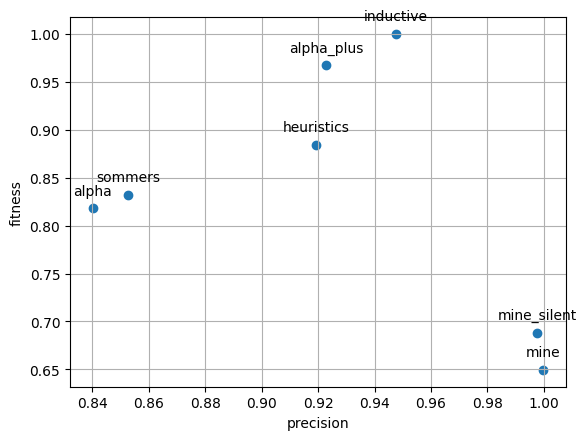

In [43]:
from matplotlib import pyplot as plt

fp_fig = plt.figure()
fp_ax = fp_fig.add_subplot(111)

fitnesses = results["fitness"]
precisions = results["precision"]

fp_ax.scatter(precisions,fitnesses)

for i,coord in enumerate(zip(precisions,fitnesses)):
    x, y = coord
    label = results.index[i]

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

fp_ax.grid()

plt.ylabel("fitness")
plt.xlabel("precision")
plt.show()

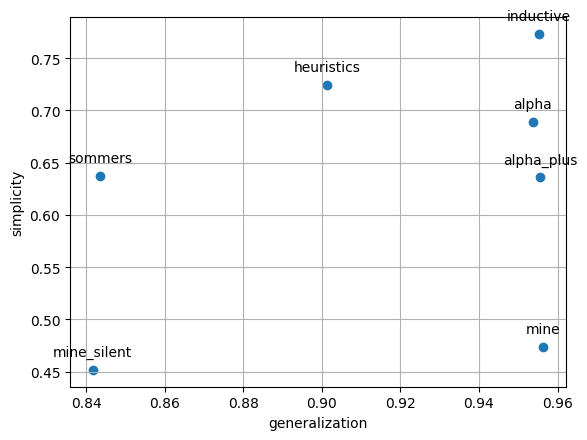

In [40]:
gs_fig = plt.figure()
gs_ax = gs_fig.add_subplot(111)

generalization = results["generalization"]
simplicity = results["simplicity"]

gs_ax.scatter(generalization,simplicity)

for i,coord in enumerate(zip(generalization,simplicity)):
    x, y = coord
    label = results.index[i]

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

gs_ax.grid()

plt.xlabel("generalization")
plt.ylabel("simplicity")
plt.show()

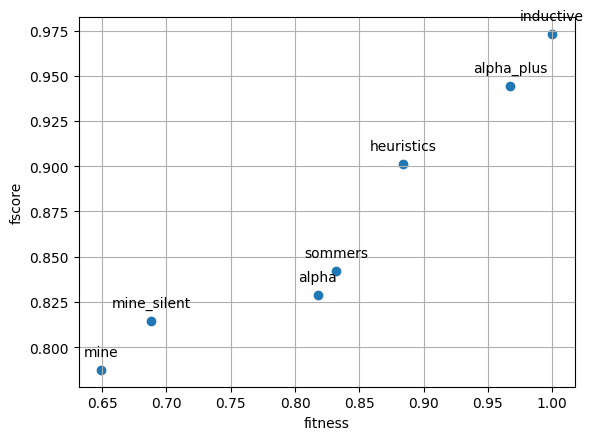

In [41]:
ffc_fig = plt.figure()
ffc_ax = ffc_fig.add_subplot(111)

fitness = results["fitness"]
fscore = results["fscore"]

ffc_ax.scatter(fitness,fscore)

for i,coord in enumerate(zip(fitness,fscore)):
    x, y = coord
    label = results.index[i]

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

ffc_ax.grid()

plt.xlabel("fitness")
plt.ylabel("fscore")
plt.show()

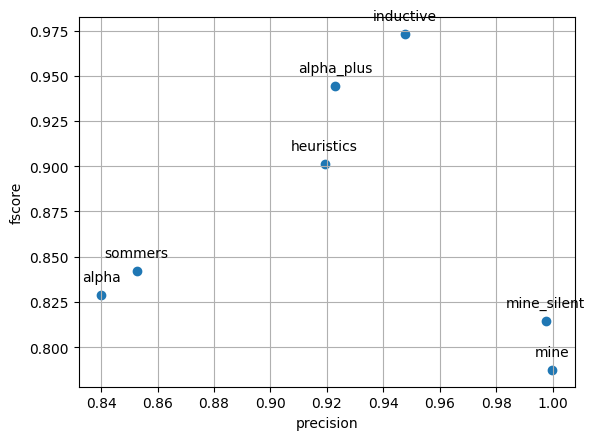

In [42]:
pfc_fig = plt.figure()
pfc_ax = pfc_fig.add_subplot(111)

precision = results["precision"]
fscore = results["fscore"]

pfc_ax.scatter(precision,fscore)

for i,coord in enumerate(zip(precision,fscore)):
    x, y = coord
    label = results.index[i]

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

pfc_ax.grid()

plt.xlabel("precision")
plt.ylabel("fscore")
plt.show()